In [0]:
# importing the needed libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt 
% matplotlib inline 

In [0]:
# reading data from our csv file
Autolib_dataset = pd.read_csv('/content/Autolib_dataset (2).csv')

In [3]:
# checking info about our dataset
print(Autolib_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [4]:
# viewing the first five rows
Autolib_dataset.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [33]:
# dropping useless columns
Autolib_dataset1 = Autolib_dataset.drop('Geo point', axis=1,)
Autolib_dataset1

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [36]:
# dropping useless columns
Autolib_dataset2 = Autolib_dataset1.drop('Scheduled at', axis=1,)
Autolib_dataset2

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27


In [37]:
# dropping useless columns
Autolib_dataset3 = Autolib_dataset2.drop('Displayed comment', axis=1,)
Autolib_dataset3

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27


In [62]:
# renaming some columns
Autolib_dataset3 .rename(columns={"Postal code":"Postalcode","Station type":"Stationtype"},inplace=True)
Autolib_dataset3 .columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Postalcode', 'Public name', 'Rental status', 'Slots',
       'Stationtype', 'Status', 'Subscription status', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [5]:
# checking if there are missing values
print(Autolib_dataset.isnull().values.any())

True


In [6]:
# checking if there are missing values across the columns
Autolib_dataset.isnull().any()

Address                False
Cars                   False
Bluecar counter        False
Utilib counter         False
Utilib 1.4 counter     False
Charge Slots           False
Charging Status        False
City                   False
Displayed comment       True
ID                     False
Kind                   False
Geo point              False
Postal code            False
Public name            False
Rental status          False
Scheduled at            True
Slots                  False
Station type           False
Status                 False
Subscription status    False
year                   False
month                  False
day                    False
hour                   False
minute                 False
dtype: bool

In [7]:
# finding the total missing values
print(Autolib_dataset.isnull().sum().sum())

9842


In [8]:
# drop all missing values
clean_Autolib_dataset = Autolib_dataset.dropna()
print(clean_Autolib_dataset)

Empty DataFrame
Columns: [Address, Cars, Bluecar counter, Utilib counter, Utilib 1.4 counter, Charge Slots, Charging Status, City, Displayed comment, ID, Kind, Geo point, Postal code, Public name, Rental status, Scheduled at, Slots, Station type, Status, Subscription status, year, month, day, hour, minute]
Index: []


In [9]:
# confirming that their exists no null values
print(clean_Autolib_dataset.isnull().sum())

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
Displayed comment      0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Scheduled at           0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64


In [10]:
# dropping all the rows that have NA values
Autolib_dropped = clean_Autolib_dataset.dropna(how="all")
print(Autolib_dropped )


Empty DataFrame
Columns: [Address, Cars, Bluecar counter, Utilib counter, Utilib 1.4 counter, Charge Slots, Charging Status, City, Displayed comment, ID, Kind, Geo point, Postal code, Public name, Rental status, Scheduled at, Slots, Station type, Status, Subscription status, year, month, day, hour, minute]
Index: []


In [0]:
# checking for duplicates 
Autolib_non_duplicates = Autolib_dropped.drop_duplicates()

In [12]:
# seeing the non duplicates
print(Autolib_non_duplicates)

Empty DataFrame
Columns: [Address, Cars, Bluecar counter, Utilib counter, Utilib 1.4 counter, Charge Slots, Charging Status, City, Displayed comment, ID, Kind, Geo point, Postal code, Public name, Rental status, Scheduled at, Slots, Station type, Status, Subscription status, year, month, day, hour, minute]
Index: []


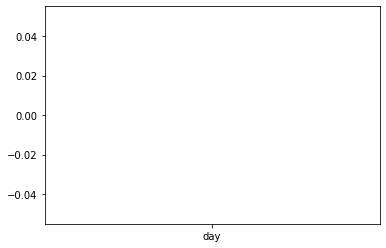

In [18]:
# checking for outliers graphically
Autolib_non_duplicates.boxplot(column =['day'], grid = False) 

In [47]:
# Identify the most popular hour of the 
# day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
Autolib_dataset3['hour'].groupby([Autolib_dataset3['day'], Autolib_dataset3['Bluecar counter'],Autolib_dataset3['year'],Autolib_dataset3['City'],Autolib_dataset3['month']]).size()

day  Bluecar counter  year  City                  month
1    0                2018  Alfortville           4        2
                            AsniÃ¨res-sur-Seine   4        3
                            Aulnay-sous-bois      4        1
                            Bagnolet              4        3
                            Boulogne-Billancourt  4        1
                                                          ..
9    6                2018  Vincennes             4        1
     7                2018  Le Plessis-Robinson   4        2
                            Nanterre              4        1
                            Paris                 4        2
                            Versailles            4        1
Name: hour, Length: 1574, dtype: int64

In [70]:
hour_shared = Autolib_dataset3['hour'].groupby([Autolib_dataset3['day'], Autolib_dataset3['Bluecar counter'],Autolib_dataset3['year'],Autolib_dataset3['City'],Autolib_dataset3['month']]).describe()
hour_shared
from scipy import stats
mostpopular_hourshared=stats.mode(Autolib_dataset3.hour)
print(mostpopular_hourshared[0])

[21]


In [48]:
# filtering the data to Paris city
Autolib_dataset3[Autolib_dataset3.City == 'Paris']

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,paris-ivry-3,STATION,75013,Paris/Ivry/3,operational,6,station,ok,nonexistent,2018,4,9,23,1
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,75010,Paris/Rocroy/15,operational,1,station,ok,nonexistent,2018,4,1,20,49
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1


In [63]:
#using scipy to show most used city
from scipy import stats
mostpopular_hour=stats.mode(Autolib_dataset3.hour)
print(mostpopular_hour[0])



[21]


In [73]:
mostpopular_postalcode=stats.mode(Autolib_dataset3.Postalcode) 
print(mostpopular_postalcode[0])

# most popular postal code

[75015]


In [0]:
Autolib_dataset3 

In [65]:
mostpopular_station=stats.mode(Autolib_dataset3.Stationtype)
print(mostpopular_station[0])

['station']
